11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


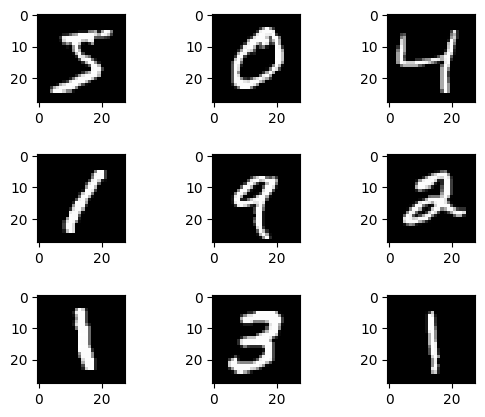

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score

#loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#shape of dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

#plotting
#plt.figure(figsize=(10, 7))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.subplots_adjust(hspace=0.6)
plt.show()

#print(x_test[0:20])

In [ ]:
# x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
# x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# # note that y is 1-d array

x_train.reshape((-1, 28, 28, 1)):

reshaping x_train and x_test to have dimensions (-1, 28, 28, 1).
The -1 in the shape means that the size of that dimension is inferred based on the size of the original data. So, it adjusts automatically to fit the data.

The (28, 28, 1) part specifies the desired shape, where 28 is the height and width of the images, and 1 is the number of channels. In this case, there is a single channel because the images are grayscale.

.astype('float32'):
The astype method is used to change the data type of the array. Here, it converts the data type of the reshaped arrays to float32.
This is a common practice in deep learning.

/ 255.0:
normalization by dividing all the pixel values by 255.0.
In the original MNIST dataset, pixel values range from 0 to 255, where 0 is black and 255 is white. Normalizing to the range [0, 1] is common in deep learning as it helps the model converge faster during training.

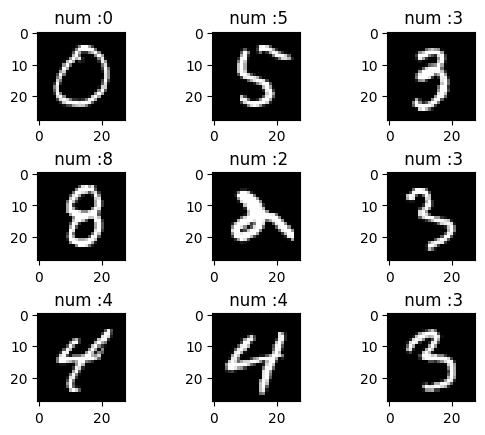

In [5]:
# Combine training data and labels (zip take tow iterators and combine each corresponding pair as a tuple and return iterator of tubles)
train_data = list(zip(x_train, y_train))
# class 'list'>

# shuffle
np.random.shuffle(train_data)

# Separate back into training data and labels : return list of tubles (pairs)
x_train, y_train = zip(*train_data)
# x_train, y_train ->  <class 'tuple'>

# Convert back to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# do the smae suffle for test data
test_data = list(zip(x_test, y_test))
np.random.shuffle(test_data)
x_test, y_test = zip(*test_data)
x_test = np.array(x_test)
y_test = np.array(y_test)

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(" num :" + str(y_train[i]))
plt.subplots_adjust(hspace=0.6)
plt.show()



In [6]:
def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

# we need feature vector for each image
# each image is 28*28  so i will take 3*3 kernal and take the center
def get_centroids(image, kernal_size):
  width, hight = image.shape[0],  image.shape[1]
  centors = []
  stride = kernal_size
  for i in range(0,width-kernal_size+1,stride):
    for j in range(0,hight-kernal_size + 1,stride):
      centors.append(image[int((i+ i+stride)/2)][int((j+ j+3)/2)]);

  np.array(centors)
  return centors

x_train_feature = np.array([get_centroids(image,2) for image in x_train])
# y_train_feature = np.array([get_centroids(image,3) for image in y_train])
x_test_feature  = np.array([get_centroids(image,2) for image in x_test])
# y_test_feature  = np.array([get_centroids(image,3) for image in y_test])

#now we have feature vectors for all data as centorid pixels of 3*3 kernal ( the gray level of pixel)

# so we will take this feature vectors and work on it

# data = list(zip(x_train_feature,y_train)) # x as feature vector and label y as it is


knn = KNeighborsClassifier(n_neighbors=1) # k = 1

# data = list(zip(x, y))
print(x_train_feature.shape)
knn.fit(x_train_feature, y_train) # take list of data (list of tuples) and clases  (class for for each tuble)

(60000, 196)


KNeighborsClassifier(n_neighbors=1)

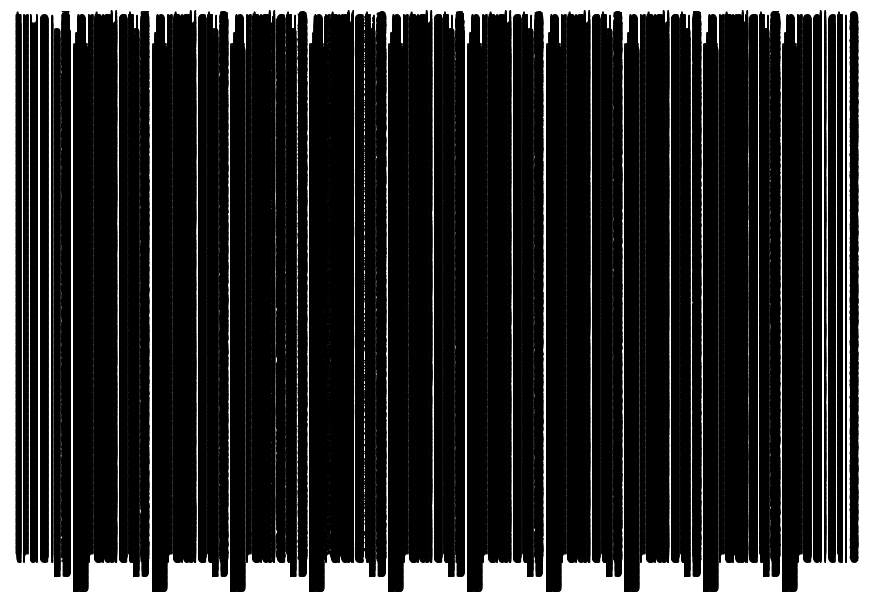

accuricy:  100 %
Adjusted Rand Index: 0.824206974469892


In [ ]:
prediction = knn.predict(x_test_feature)

square_error = 0

#for i, image in enumerate(x_test):
plt.figure(figsize=(10, 7))
for i in range(len(prediction)):
  plt.subplot( int(len(prediction)/10), 10 , i + 1)  # Using 4 rows and 5 columns
  plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
  plt.title(" true: "+ str(y_test[i]) + " predict:" + str(prediction[i]))
  squar_error = abs(int(str(y_test[i])) - int(str(prediction[i]))) ** 2

plt.subplots_adjust(hspace=0.6)
plt.show()

print("accuricy: ", (1-square_error)*100 , "%" )
ari_score = adjusted_rand_score(y_test, prediction)
print(f"Adjusted Rand Index: {ari_score}")

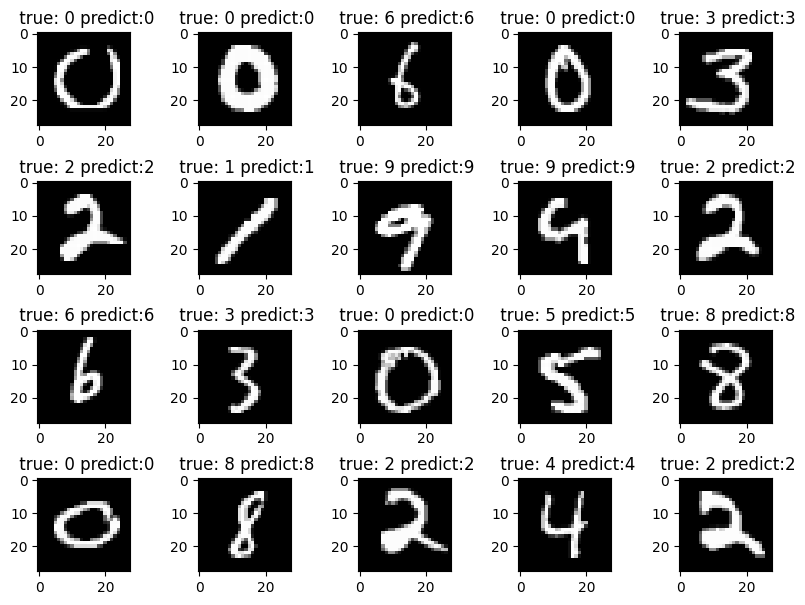

accuricy:  100 %
Adjusted Rand Index: 0.9182675608729514


In [7]:
prediction = knn.predict(x_test_feature)

square_error = 0

#for i, image in enumerate(x_test):
plt.figure(figsize=(10, 7))
for i in range(20):
  plt.subplot( 4, 5 , i + 1)  # Using 4 rows and 5 columns
  plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
  plt.title(" true: "+ str(y_test[i]) + " predict:" + str(prediction[i]))
  squar_error = abs(int(str(y_test[i])) - int(str(prediction[i]))) ** 2

plt.subplots_adjust(hspace=0.6)
plt.show()

print("accuricy: ", (1-square_error)*100 , "%" )
ari_score = adjusted_rand_score(y_test, prediction)
print(f"Adjusted Rand Index: {ari_score}")

**implemnt KNN and try again**

 begin  8454


<ipython-input-6-26ef9431c6dd>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return np.sqrt(np.sum(np.power(p1 - p2, 2)))


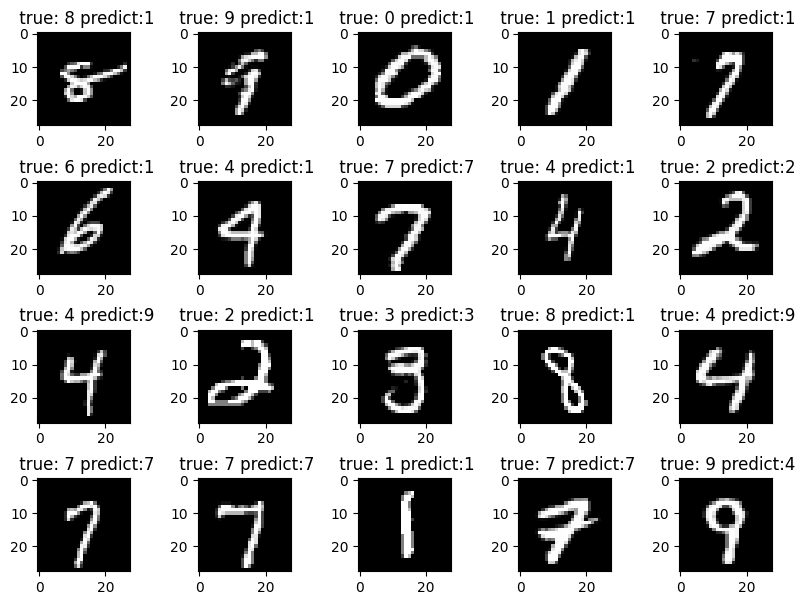

accuricy = 60.0  %


In [19]:
# x_train_feature = np.array([get_centroids(image,3) for image in x_train])
# x_test_feature  = np.array([get_centroids(image,3) for image in x_test])


def knn(train_vectors, train_classes, test_vectors):
  test_all_results = []
  test_classes_all_results = []
  for test_item in test_vectors:
    test_result = 0
    test_class  = 0

    # for each item in train set will compute nearest train item to the test item
    # for all train vectors
    dist = 1e9
    for i in range(len(train_vectors)):

      # loop on each vector
      sum = 0
      for k in range(len(train_vectors[i])): # for each train item train_vectors[i] is a feature vector of training data
        sum += distance(train_vectors[i,k], test_item[k])

      if(sum<=dist):
        dist = sum
        test_result = train_vectors[i]
        test_class  = train_classes[i]
    test_all_results.append(test_result)
    test_classes_all_results.append(test_class)

  return test_all_results, test_classes_all_results

# take 500 item from train data
# print(" x test : " , x_test_feature)
# print("len x test : " , len(x_test_feature))
begin = np.random.randint(0, (len(x_test_feature)-550 + len(x_test_feature)) % len(x_test_feature))
print(" begin ", begin)
new_x_train_feature = x_train_feature[begin:begin+500]
new_y_train = y_train[begin:begin+500]

# take 20 item to test
test_images = x_test[begin+500:begin+520] # image itself
new_x_test_feature = x_test_feature[begin+500:begin+520] # feature vector of image
new_y_test = y_test[begin+500:begin+520]

test_vectors_results, test_classes = knn(new_x_train_feature, new_y_train, new_x_test_feature)
error = 0
plt.figure(figsize=(10, 7))
for i in range(20):
  plt.subplot( 4, 5 , i + 1)  # Using 4 rows and 5 columns
  plt.imshow(test_images[i], cmap=plt.get_cmap('gray')) # we print x_test itself not it's vector
  plt.title(" true: "+ str(new_y_test[i]) + " predict:" + str(test_classes[i]))
  if  new_y_test[i] != test_classes[i]:
    error += 1
plt.subplots_adjust(hspace=0.6)
plt.show()
print("accuricy =", (error/20)*100 , " %")


 begin  2802


<ipython-input-6-26ef9431c6dd>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return np.sqrt(np.sum(np.power(p1 - p2, 2)))


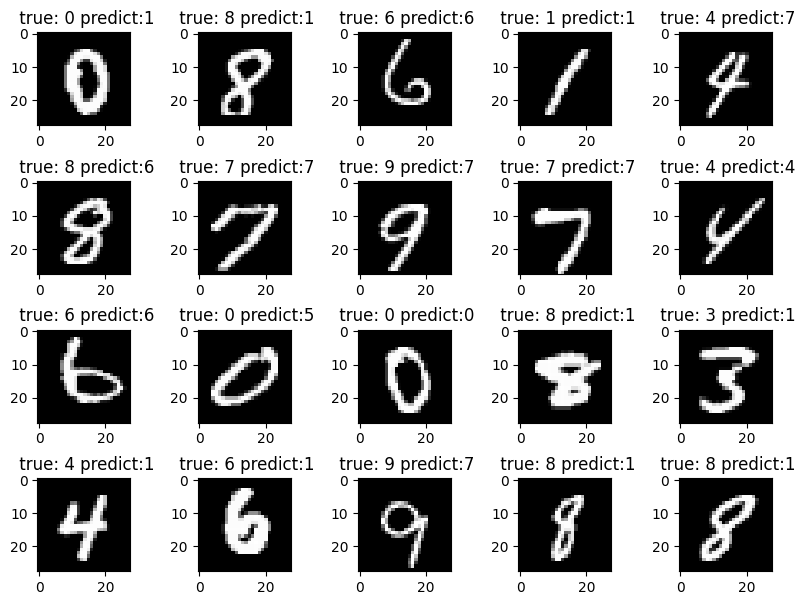

accuricy = 65.0  %


In [20]:
# test with 2000 train data

begin = np.random.randint(0, (len(x_test_feature)-2050 + len(x_test_feature)) % len(x_test_feature))
print(" begin ", begin)
new_x_train_feature = x_train_feature[begin:begin+2000]
new_y_train = y_train[begin:begin+2000]

# take 20 item to test
test_images = x_test[begin+2000:begin+2020] # image itself
new_x_test_feature = x_test_feature[begin+2000:begin+2020] # feature vector of image
new_y_test = y_test[begin+2000:begin+2020]

test_vectors_results, test_classes = knn(new_x_train_feature, new_y_train, new_x_test_feature)

error = 0
plt.figure(figsize=(10, 7))
for i in range(20):
  plt.subplot( 4, 5 , i + 1)  # Using 4 rows and 5 columns
  plt.imshow(test_images[i], cmap=plt.get_cmap('gray')) # we print x_test itself not it's vector
  plt.title(" true: "+ str(new_y_test[i]) + " predict:" + str(test_classes[i]))
  if  new_y_test[i] != test_classes[i]:
    error += 1
plt.subplots_adjust(hspace=0.6)
plt.show()
print("accuricy =", (error/20)*100 , " %")